# Summarizing metrics from disturbed horizontal lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [81]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metric_plots as mp
import py.metrics_disturb as me
import regression as rg
import matplotlib.cm as cm
import py.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_horiz.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [ ]:
me.horizDisturbSummaries(os.path.join(cfg.path.server, 'singleDisturb')
                         , os.path.join(cfg.path.fig, 'singleDisturb'), overwrite=False)

In [88]:
ms = me.metricDisturbSummary(os.path.join(cfg.path.fig, 'singleDisturb', 'horizDisturbSummaries.csv')
                             , diag=True)

Independents: ['printFolder', 'bn', 'date', 'sigma', 'fluFile', 'calibFile', 'spacing', 'vRatio', 'dEst', 'viscRatio', 'rGrav', 'int_Re', 'ReRatio', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['delta_segments', 'delta_roughness', 'delta_totlen_n', 'delta_meanT_n', 'delta_yc_n', 'w_dy0l', 'd_dy0l', 'd_dy0r', 'd_dy0lr', 'd_space_b']


In [57]:
def waterOilPlots(yvar:str, yideal:float, mode:str='ppt', export:bool=False):
    if mode=='ppt':
        figsize = (9,6)
        fs = 18
        markersize=100
    elif mode=='paper':
        figsize=(6,4)
        fs = 10
        markersize=20
    fig,axs = plt.subplots(1,2,figsize=figsize, sharey=True, sharex=True)
    ms.ss.sort_values(by=['sigma', 'sup_val'], inplace=True)
    for i,sigma in enumerate(ms.ss.sigma.unique()):
        mp.scatterSS(ms, ms.ss[ms.ss.sigma==sigma], 'spacing', yvar, 'sup_val'
                 ,fig=fig, ax=axs[i], logx=False, yideal=yideal, xideal=0.875, fontsize=fs, markersize=markersize, legend=False)
    for ax in axs:
        mp.setSquare(ax)
        if ms.ss[yvar].min()<0:
            yy = ms.ss[yvar].min()*0.9
        else:
            yy = ms.ss[yvar].max()*0.9
        ax.text(0.88, yy, 'space filling', color='#555555', fontsize=fs)
        ax.text(1.08, 0.01, 'ideal', color='#555555', fontsize=fs)
    axs[0].set_title('Water/water', fontsize=fs)
    axs[1].set_title('Oil/water', fontsize=fs)
    fig.tight_layout()
    if export:
        fig.savefig(os.path.join(cfg.path.fig, 'singleDisturb', 'figures', f'horiz_{yvar}.svg'), bbox_inches='tight', dpi=300)

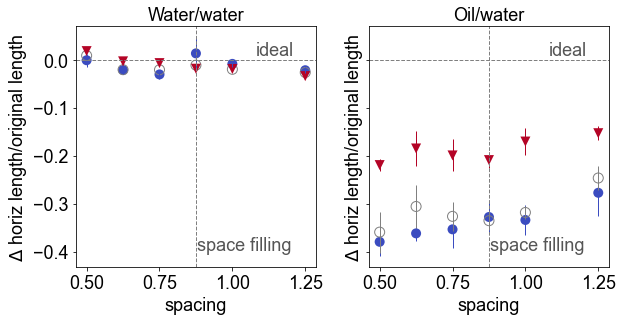

In [58]:
waterOilPlots('delta_totlen_n', 0)

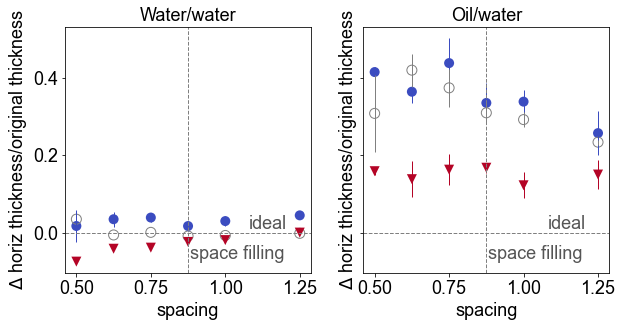

In [89]:
waterOilPlots('delta_meanT_n', 0)

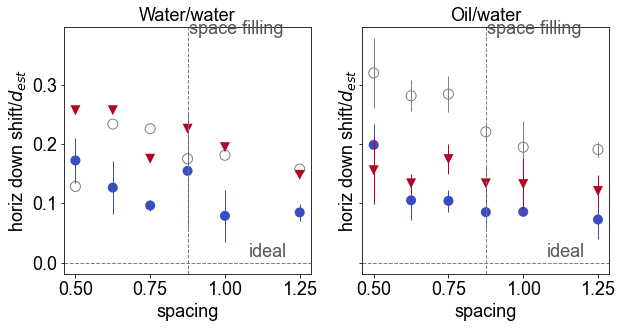

In [61]:
waterOilPlots('delta_yc_n', 0)

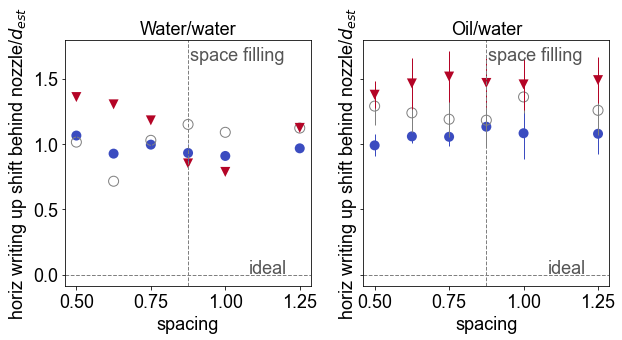

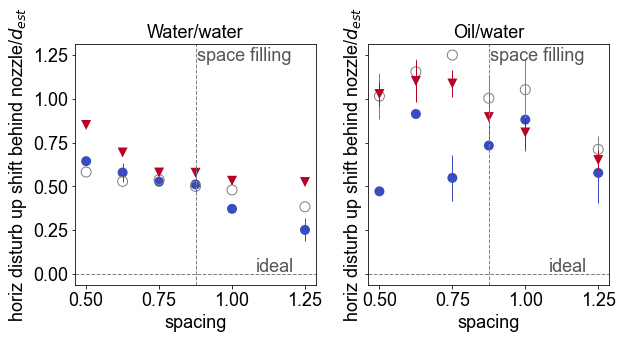

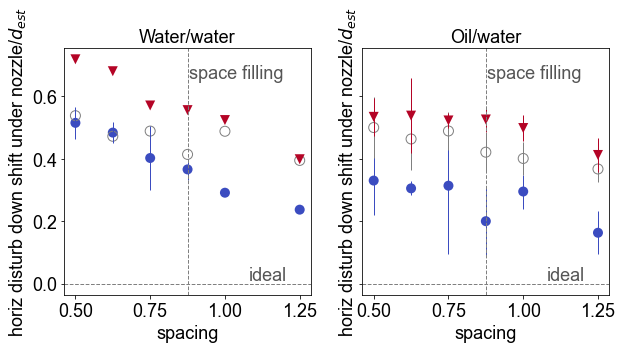

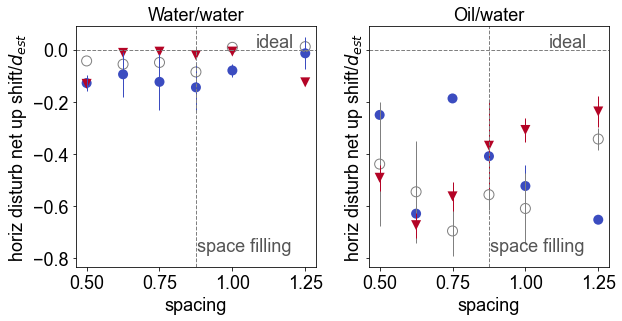

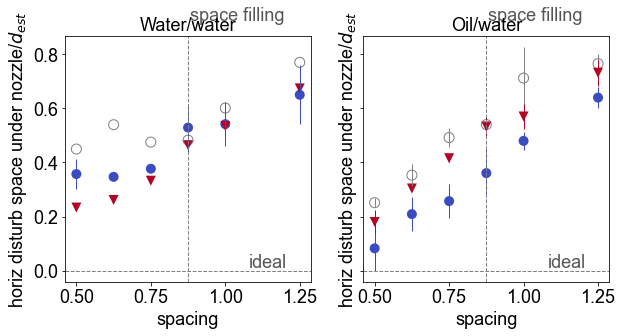

In [72]:
for s in ['w_dy0l', 'd_dy0l', 'd_dy0r', 'd_dy0lr', 'd_space_b']:
    waterOilPlots(s, 0)

In [70]:
ms.ss[(ms.ss.ink_base=='water')&(ms.ss.d_dy0r>0.6)]

,printFolder,bn,date,sigma,fluFile,calibFile,spacing,vRatio,dEst,viscRatio,...,w_dy0l,w_dy0l_SE,d_dy0l,d_dy0l_SE,d_dy0r,d_dy0r_SE,d_dy0lr,d_dy0lr_SE,d_space_b,d_space_b_SE
7,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_2.25_220928_v2,220928.0,0.0,True,True,0.62,1.0,0.6,15.21,...,0.93,0.05,0.56,0.04,0.86,0.32,0.30,0.35,0.30,0.09
18,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_2.75_220928,220928.0,0.0,True,True,0.50,1.0,0.6,1.45,...,1.36,0.06,0.85,0.03,0.72,0.12,-0.13,0.13,0.23,0.08
19,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_2.75_220928,220928.0,0.0,True,True,0.62,1.0,0.6,1.45,...,1.30,0.04,0.69,0.04,0.68,0.08,-0.01,0.09,0.26,0.08


In [78]:
inspect = ms.ss[(ms.ss.spacing==0.75)&(ms.ss.delta_meanT_n>0.2)&(ms.ss.sup_val==4)]
inspect

,printFolder,bn,date,sigma,fluFile,calibFile,spacing,vRatio,dEst,viscRatio,...,w_dy0l,w_dy0l_SE,d_dy0l,d_dy0l_SE,d_dy0r,d_dy0r_SE,d_dy0lr,d_dy0lr_SE,d_space_b,d_space_b_SE
38,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M7_S_4.00_220930,220930.0,42.1,True,True,0.75,1.0,0.6,0.06,...,1.78,0.04,1.21,0.06,0.57,0.03,-0.64,0.05,0.40,0.05
83,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M9_S_4.00_220930,220930.0,42.1,True,True,0.75,1.0,0.6,0.09,...,1.14,0.18,0.94,0.10,0.48,0.08,-0.46,0.12,0.44,0.08


In [85]:
folder = inspect.iloc[1]['printFolder']
fh.openExplorer(folder)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbHoriz2_0.750\disturbHoriz2_0.750_horizMeasure_I_M9_S_4.00_220930_155232_7.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\mineral_LapRD_visc\I_M9_S_4.00\I_M9_S_4.00_220930\disturbHoriz2_0.750\disturbHoriz2_0.750_horizSummary_I_M9_S_4.00_220930_155232_7.csv


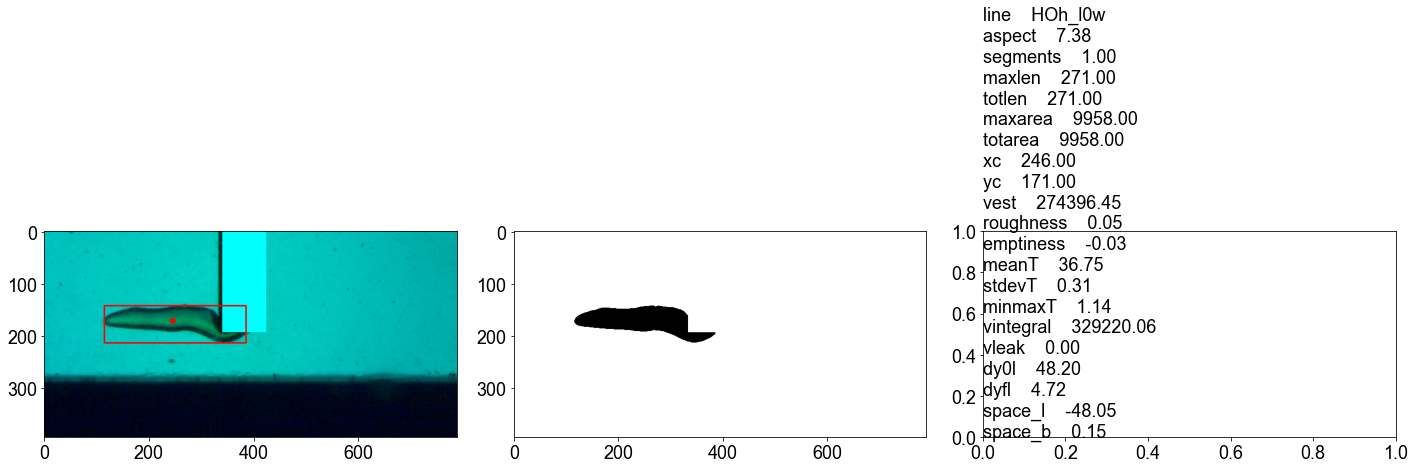

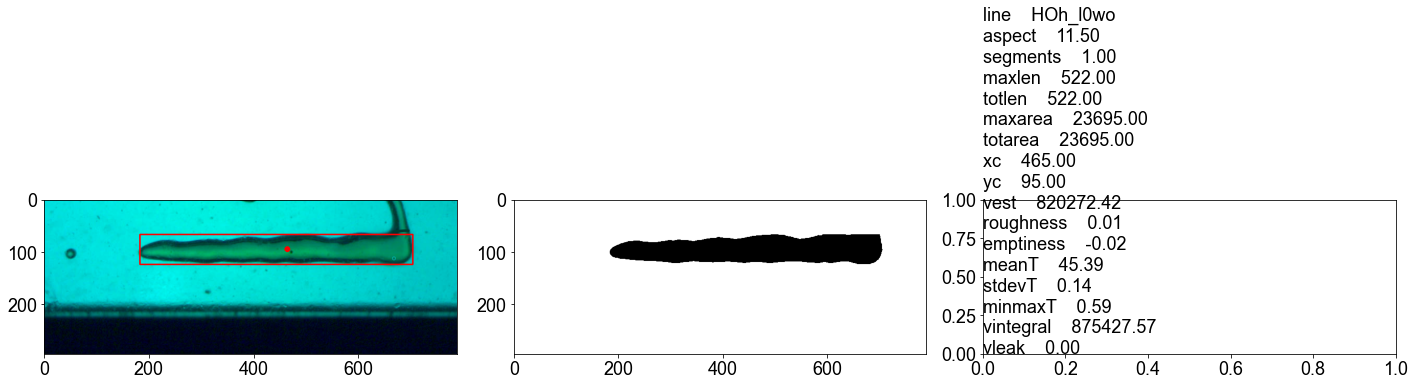

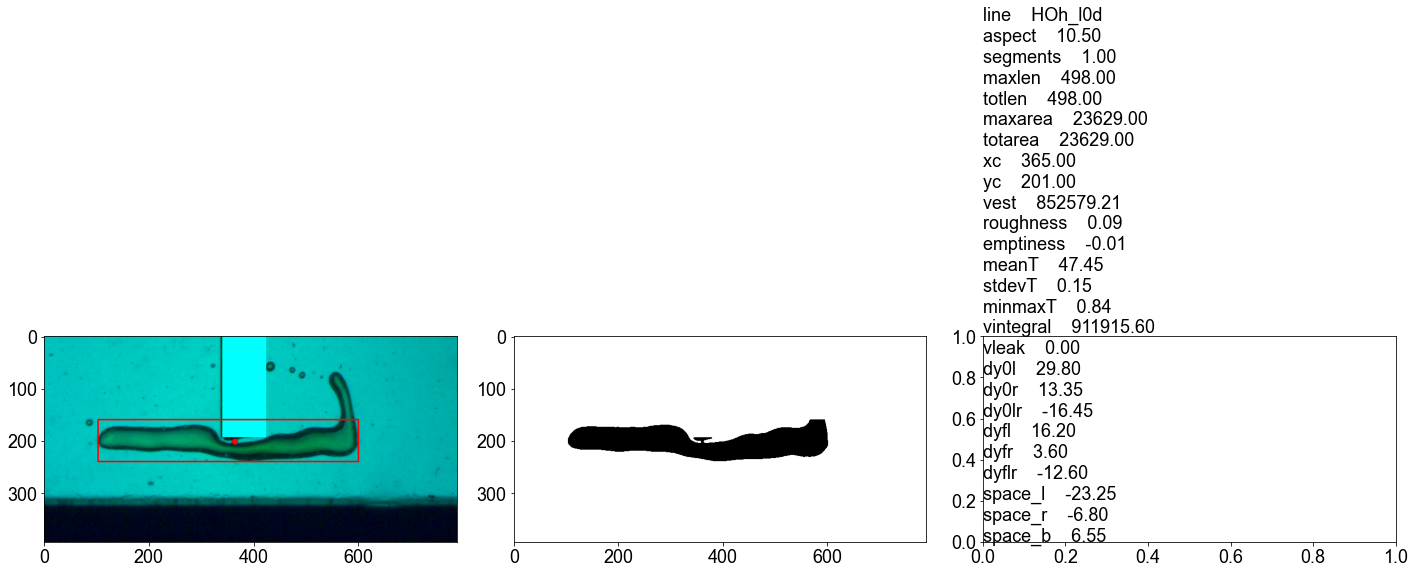

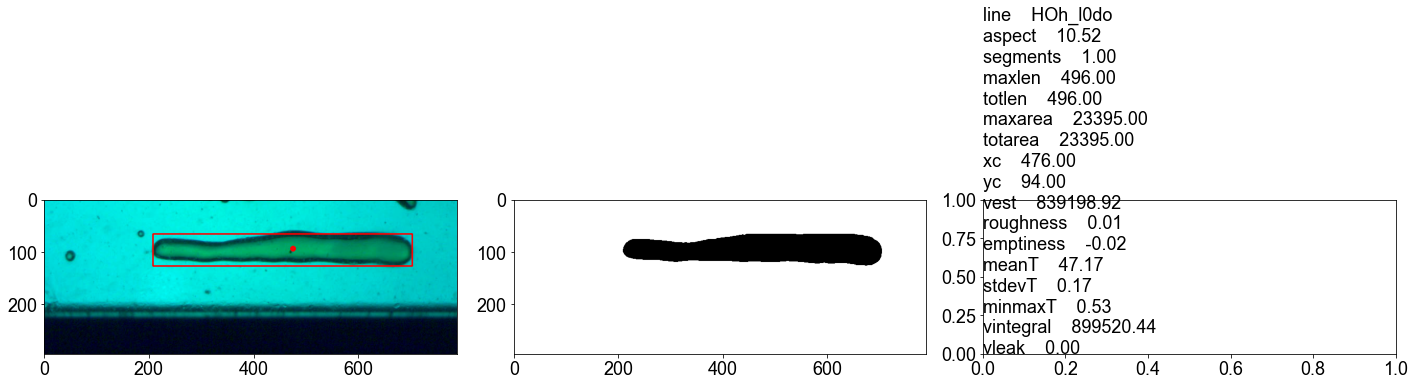

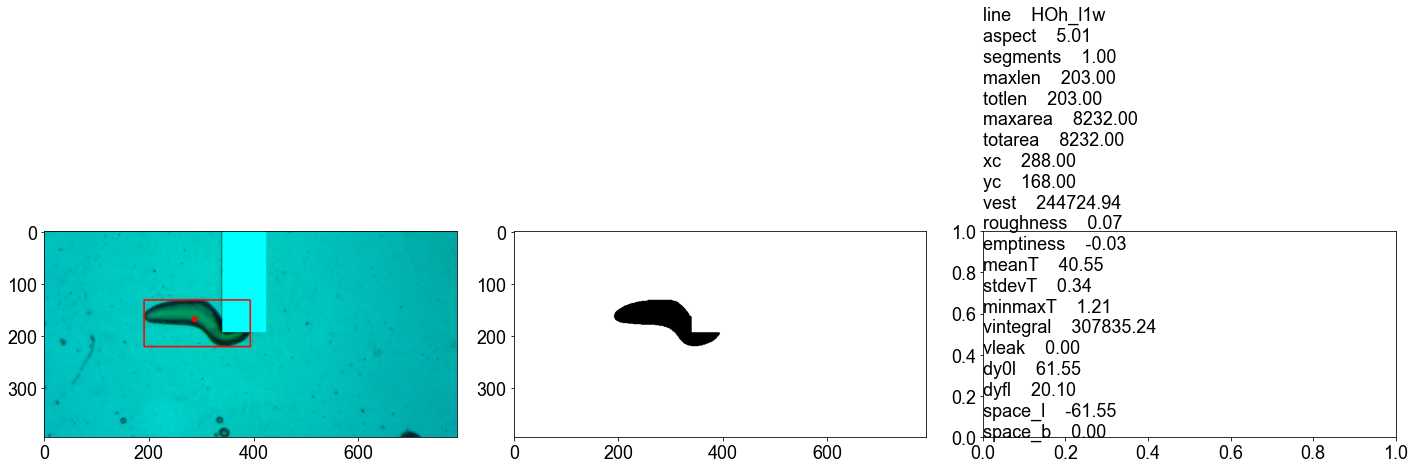

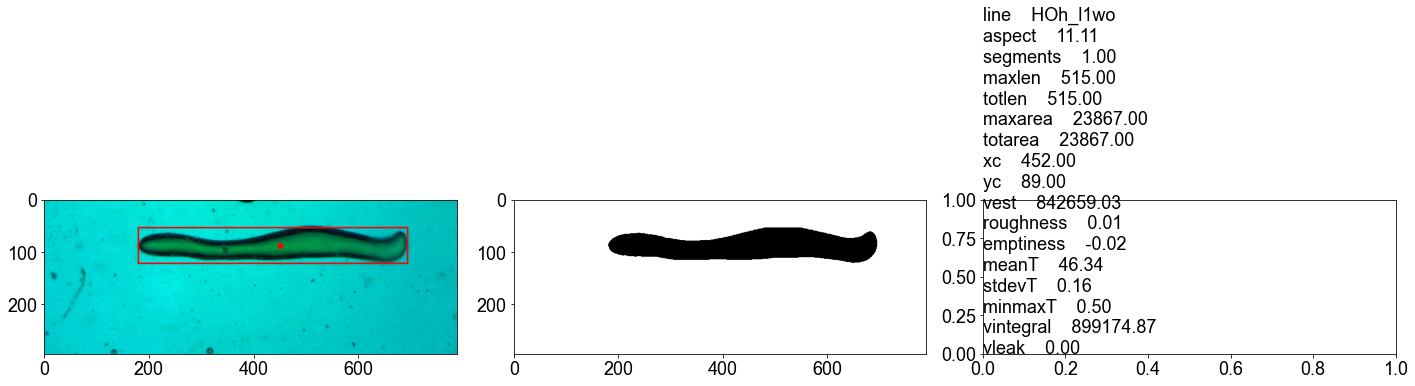

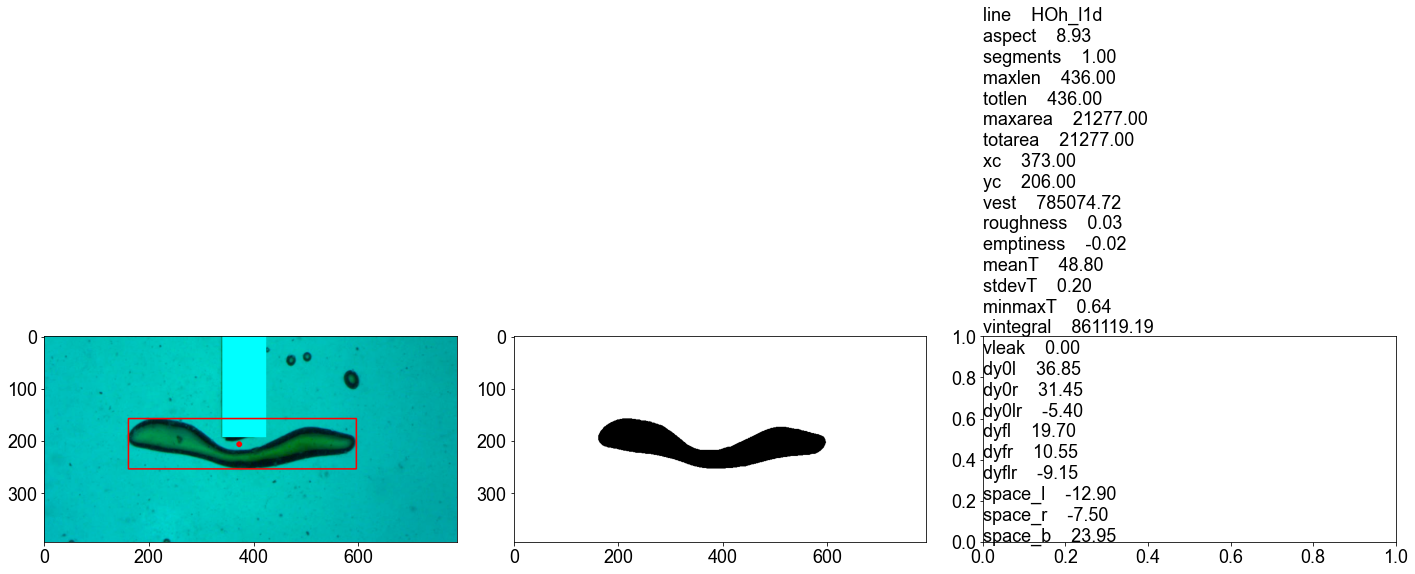

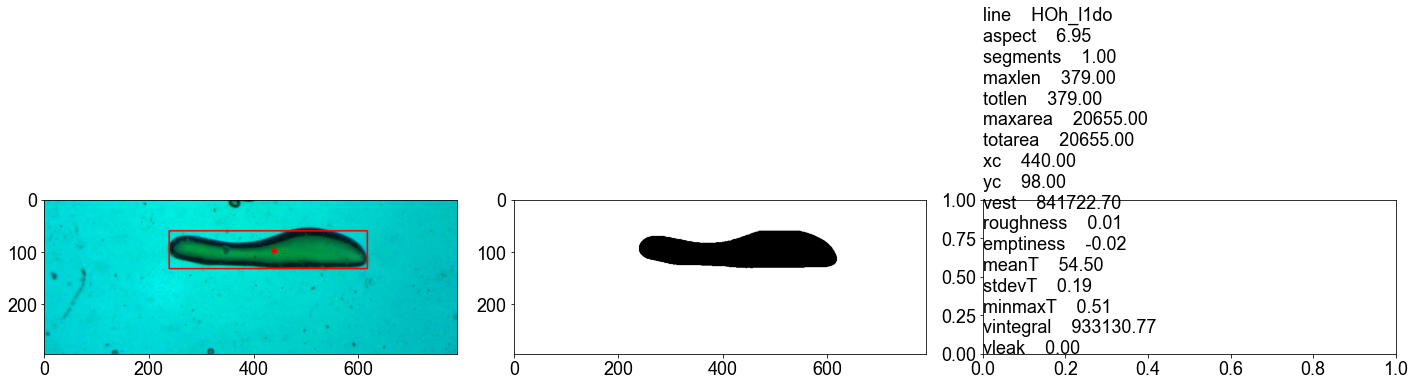

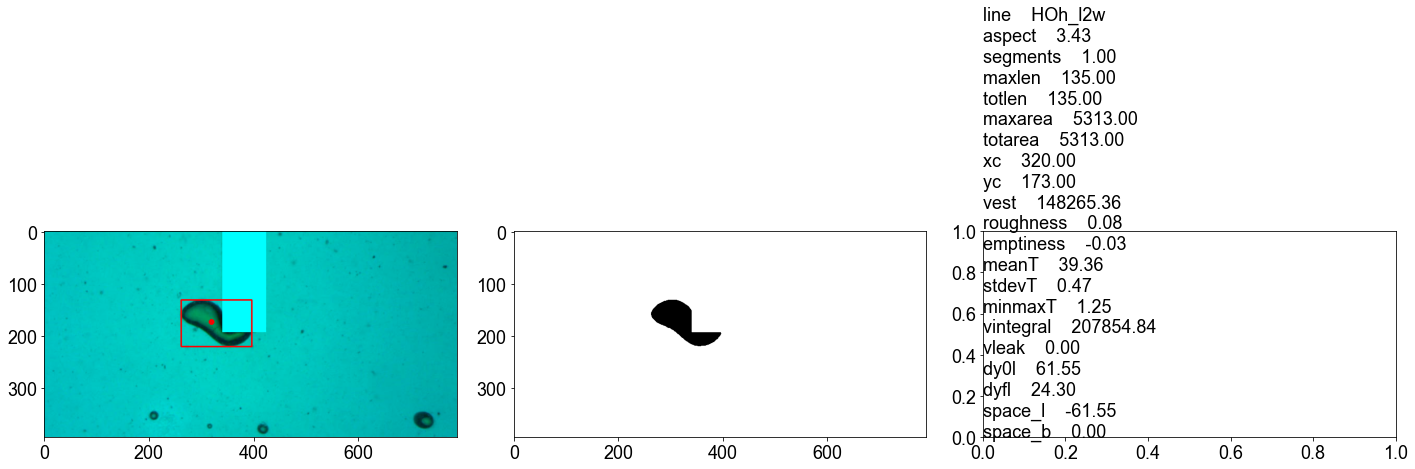

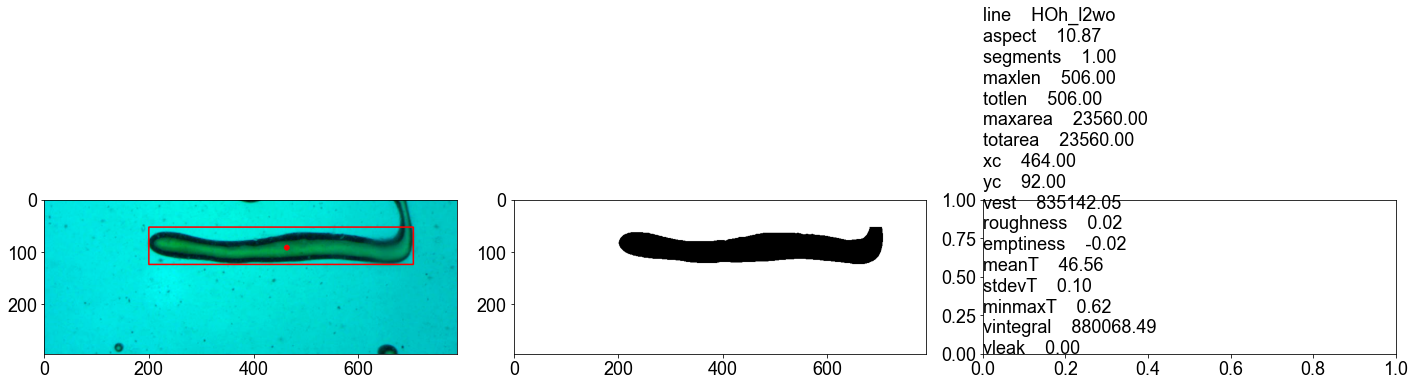

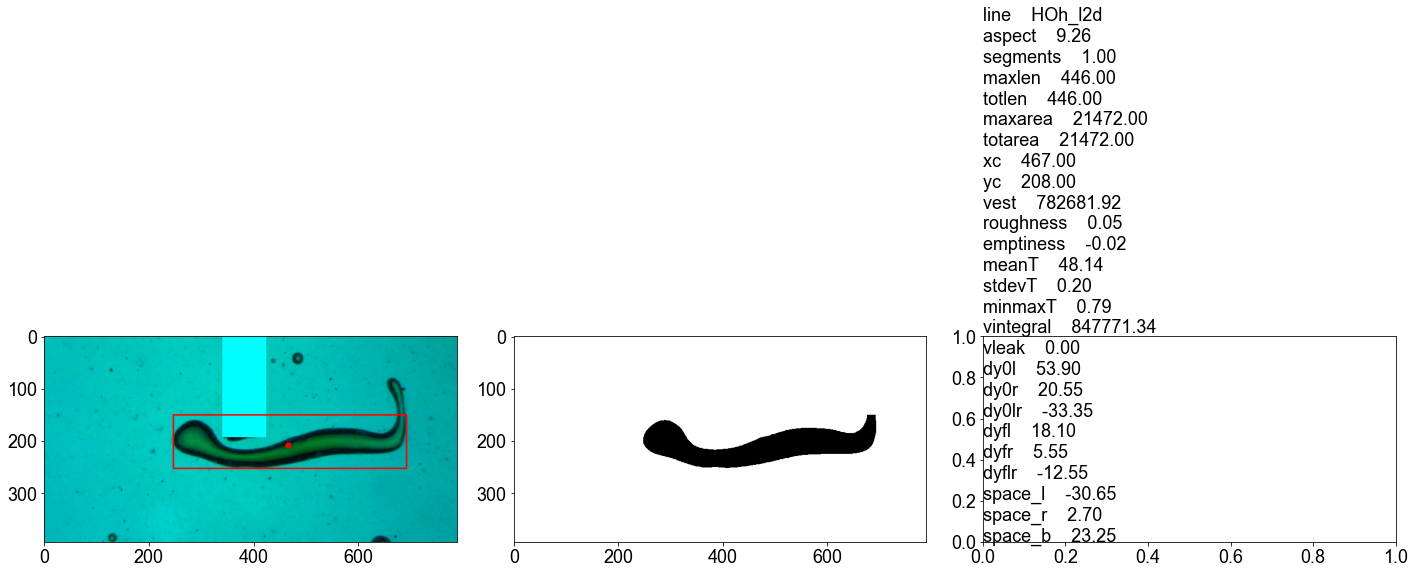

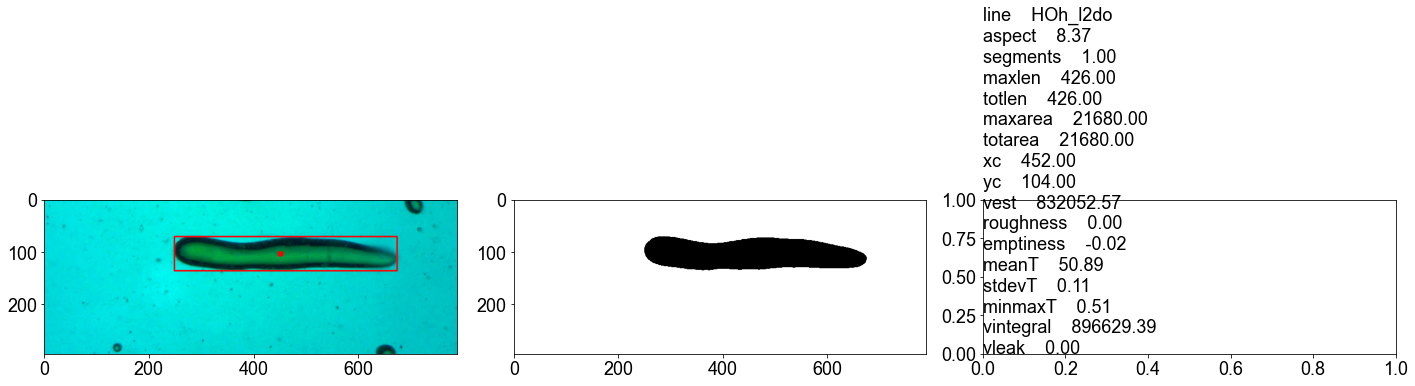

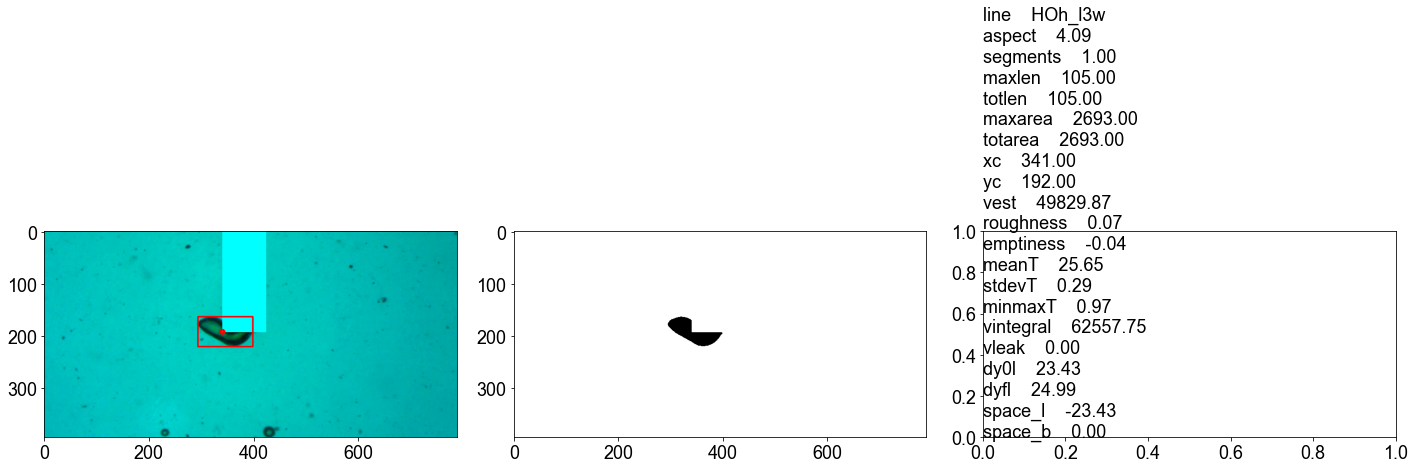

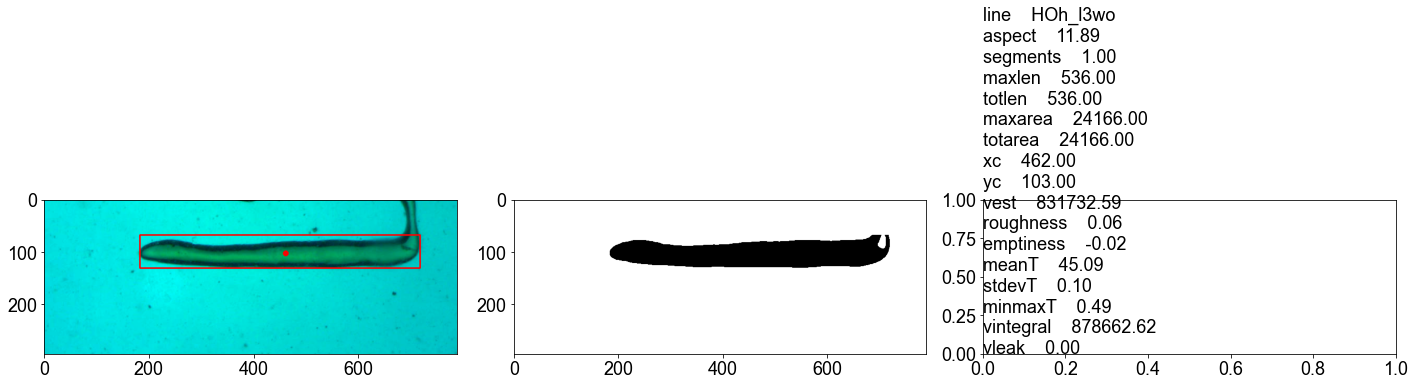

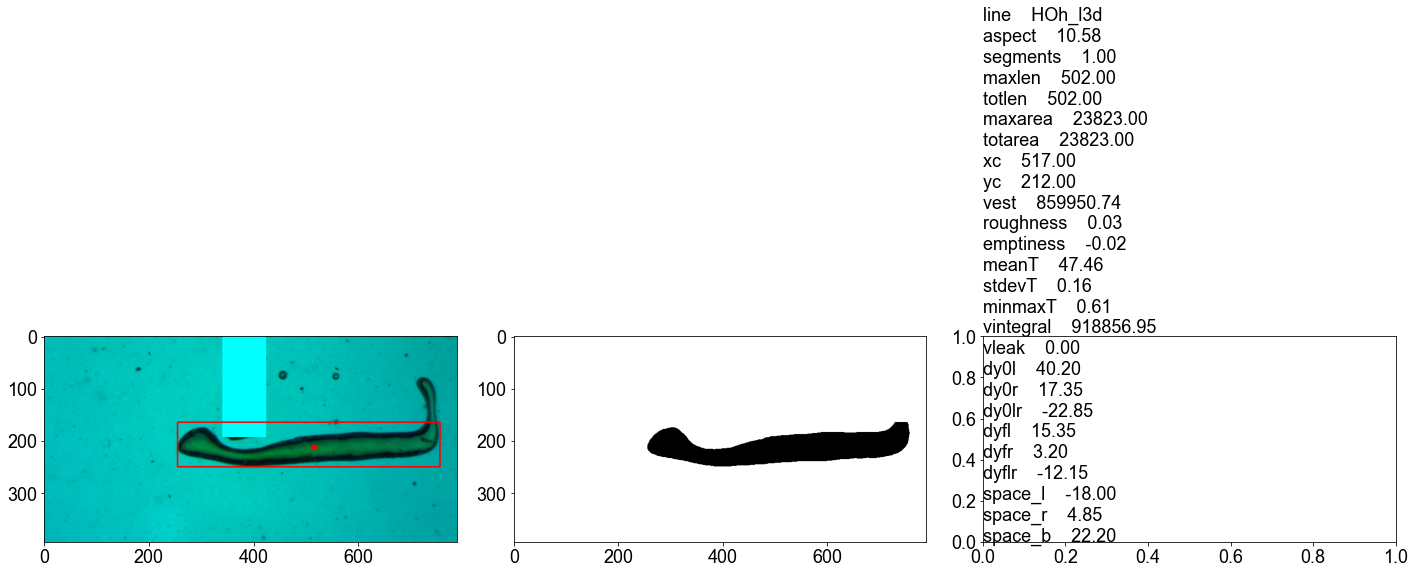

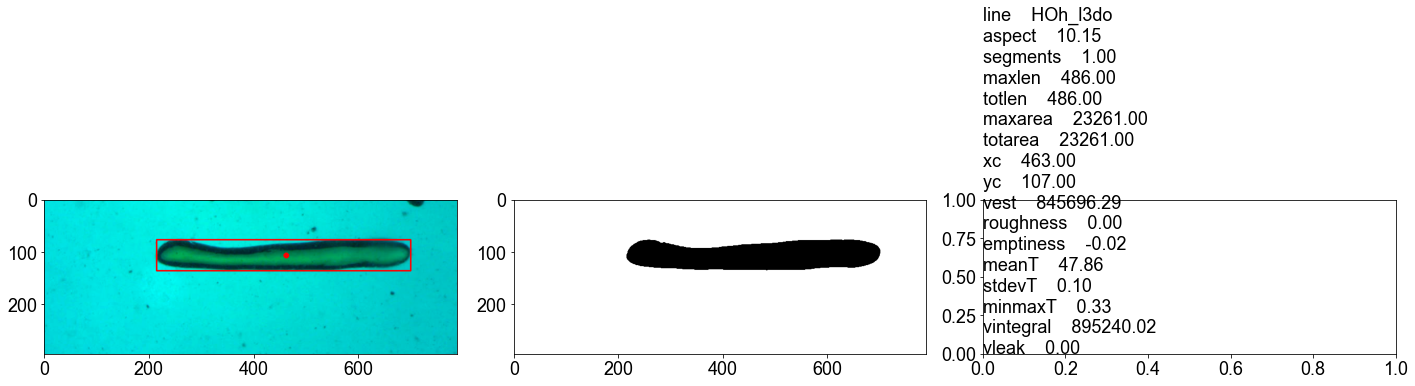

In [87]:
me.horizDisturbMeasures(folder, overwrite=True, diag=1)
me.horizDisturbSummary(folder, overwrite=True);